In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame, ExcelWriter
import xlrd
%matplotlib inline

In [91]:
file_path = 'D:\IFHO.xlsx'
output_filename ='Output_IFHO.xlsx'

In [92]:
data = pd.read_excel(file_path,sheetname='Data_1',skiprows=[0,2])
#data.info()

In [93]:
#Renombramos columnas del df para normalizarlas y poder utilizar con otros archivos
IFHO_names ={'Source WCEL Name':'Source_Cell_Name','Target WCEL Name':'Target_Cell_Name','Att':'HO_att'}
data.rename(columns=IFHO_names, inplace=True)

In [94]:
data['Source_SITE'] = Series([x[0:6] for x in data['Source_Cell_Name']])
data['Target_SITE'] = Series([x[0:6] for x in data['Target_Cell_Name']])

In [95]:
CoSite_df = data[(data.Neighbor == 'Yes') & (data.Source_SITE == data.Target_SITE)]
missingCositeNeighbour = data[(data.Neighbor == 'No ') & (data.Source_SITE == data.Target_SITE)]
Matrix_dict = {x:y[['Source_Cell_Name','Target_Cell_Name','HO_att']].groupby(['Source_Cell_Name','Target_Cell_Name']).HO_att.sum().unstack() for x,y in list(CoSite_df.groupby('Source_SITE'))}

def toexcel(IFHO_dict,df,file_name = 'IFHO_output.xlsx'):
    writer = pd.ExcelWriter(file_name, engine='xlsxwriter')
    for x in IFHO_dict.keys():
        IFHO_dict[x].to_excel(writer,sheet_name=x)
    df.to_excel(writer,sheet_name='Missing_CoSite')
    writer.save()
    writer.close()

toexcel(Matrix_dict,missingCositeNeighbour,output_filename)

Sitios en archivo
[u'ENOGOY' u'EURDIC' u'WGYSRM' u'EPBARR' u'HRAERO' u'HRBRNQ' u'HRCAPM'
 u'HRFONT' u'HRLIGU' u'HRPQ2F' u'HRRNGR' u'HRTRFD' u'HRWALL' u'HRSGLK'
 u'HRSCTL']
50 Missing Co-Site Relations


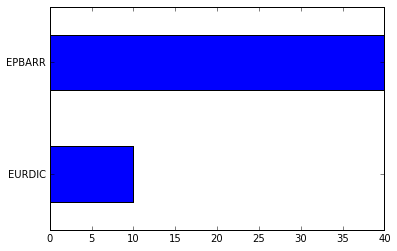

In [96]:

print "Sitios en archivo"
print data.Source_SITE.unique()
print '%s Missing Co-Site Relations' %len(missingCositeNeighbour)
if len(missingCositeNeighbour)>0:
    missingCositeNeighbour.Source_SITE.value_counts(ascending=True).plot(kind='barh')


In [97]:
from IPython.display import display
for k,matriz in Matrix_dict.iteritems():
    print "\n:::::::: %s :::::::::\n" %k
    display(matriz)
    



:::::::: HRBRNQ :::::::::



Target_Cell_Name,HRBRNQA,HRBRNQB,HRBRNQC,HRBRNQD,HRBRNQE,HRBRNQF,HRBRNQM,HRBRNQN,HRBRNQO,HRBRNQP,HRBRNQQ,HRBRNQR,HRBRNQS,HRBRNQT,HRBRNQU,HRBRNQV,HRBRNQW,HRBRNQX
Source_Cell_Name,,,,,,,,,,,,,,,,,,
HRBRNQA,NaN,NaN,NaN,NaN,NaN,NaN,2510,671,115,39,14,71,760,56,33,0,0,17
HRBRNQB,NaN,NaN,NaN,NaN,NaN,NaN,63,594,407,222,498,29,14,57,97,22,105,3
HRBRNQC,NaN,NaN,NaN,NaN,NaN,NaN,139,39,3,84,2490,195,27,4,1,5,610,57
HRBRNQD,NaN,NaN,NaN,NaN,NaN,NaN,243,4885,119,9,3,145,93,619,31,1,0,21
HRBRNQE,NaN,NaN,NaN,NaN,NaN,NaN,168,653,87,302,328,3,40,66,23,25,57,0
HRBRNQF,NaN,NaN,NaN,NaN,NaN,NaN,167,42,5,75,379,795,38,0,1,10,70,192
HRBRNQM,3392,3,1,70,3,195,NaN,NaN,NaN,NaN,NaN,NaN,1113,13,0,1,1,32
HRBRNQN,265,304,5,2485,21,35,NaN,NaN,NaN,NaN,NaN,NaN,58,1211,139,0,2,2
HRBRNQO,19,2089,8,84,178,0,NaN,NaN,NaN,NaN,NaN,NaN,1,93,389,26,1,0



:::::::: HRTRFD :::::::::



Target_Cell_Name,HRTRFDA,HRTRFDB,HRTRFDC,HRTRFDM,HRTRFDN,HRTRFDO,HRTRFDS,HRTRFDT,HRTRFDU
Source_Cell_Name,,,,,,,,,
HRTRFDA,NaN,NaN,NaN,767,36,23,123,5,3
HRTRFDB,NaN,NaN,NaN,21,2566,82,3,451,13
HRTRFDC,NaN,NaN,NaN,36,65,1259,4,14,250
HRTRFDM,1217,24,61,NaN,NaN,NaN,266,5,7
HRTRFDN,15,1553,85,NaN,NaN,NaN,4,355,12
HRTRFDO,68,51,1925,NaN,NaN,NaN,12,11,351
HRTRFDS,1312,23,53,273,2,9,NaN,NaN,NaN
HRTRFDT,29,1900,92,2,590,20,NaN,NaN,NaN
HRTRFDU,62,52,1935,11,6,443,NaN,NaN,NaN



:::::::: EPBARR :::::::::



Target_Cell_Name,EPBARRA,EPBARRB,EPBARRC,EPBARRD,EPBARRE,EPBARRF,EPBARRM,EPBARRN,EPBARRO,EPBARRP,EPBARRQ,EPBARRR,EPBARRS,EPBARRT,EPBARRU,EPBARRV,EPBARRW,EPBARRX
Source_Cell_Name,,,,,,,,,,,,,,,,,,
EPBARRA,NaN,NaN,NaN,NaN,NaN,NaN,415,85,0,2,467,0,107,NaN,NaN,1,89,0
EPBARRB,NaN,NaN,NaN,NaN,NaN,NaN,1,722,0,0,26,5,NaN,152,NaN,5,2,1
EPBARRC,NaN,NaN,NaN,NaN,NaN,NaN,0,2,8,0,3,4,0,NaN,4,0,0,1
EPBARRD,NaN,NaN,NaN,NaN,NaN,NaN,14,2,NaN,5,NaN,0,3,0,NaN,2,NaN,NaN
EPBARRE,NaN,NaN,NaN,NaN,NaN,NaN,37,67,0,0,837,5,NaN,13,0,NaN,137,NaN
EPBARRF,NaN,NaN,NaN,NaN,NaN,NaN,0,15,3,0,2,121,0,NaN,0,NaN,NaN,15
EPBARRM,823,0,0,68,534,0,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,0,NaN,0
EPBARRN,2,891,8,1,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,0,0,NaN
EPBARRO,0,0,23,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0



:::::::: HRPQ2F :::::::::



Target_Cell_Name,HRPQ2FA,HRPQ2FB,HRPQ2FC,HRPQ2FM,HRPQ2FN,HRPQ2FO,HRPQ2FS,HRPQ2FT,HRPQ2FU
Source_Cell_Name,,,,,,,,,
HRPQ2FA,NaN,NaN,NaN,4,1,24,0,0,13
HRPQ2FB,NaN,NaN,NaN,0,28,2,1,1,0
HRPQ2FC,NaN,NaN,NaN,17,4,19,8,0,8
HRPQ2FM,11,2,15,NaN,NaN,NaN,3,0,1
HRPQ2FN,1,18,2,NaN,NaN,NaN,0,11,0
HRPQ2FO,22,0,19,NaN,NaN,NaN,1,0,18
HRPQ2FS,11,3,26,2,5,1,NaN,NaN,NaN
HRPQ2FT,3,23,6,0,25,0,NaN,NaN,NaN
HRPQ2FU,36,0,21,0,0,15,NaN,NaN,NaN



:::::::: HRWALL :::::::::



Target_Cell_Name,HRWALLA,HRWALLB,HRWALLC,HRWALLM,HRWALLN,HRWALLO,HRWALLS,HRWALLT,HRWALLU
Source_Cell_Name,,,,,,,,,
HRWALLA,NaN,NaN,NaN,219,14,0,214,2,2
HRWALLB,NaN,NaN,NaN,17,250,2,9,17,7
HRWALLC,NaN,NaN,NaN,4,7,81,1,6,46
HRWALLM,623,36,12,NaN,NaN,NaN,167,9,0
HRWALLN,18,1627,163,NaN,NaN,NaN,16,378,14
HRWALLO,13,104,742,NaN,NaN,NaN,2,20,268
HRWALLS,414,6,4,416,22,3,NaN,NaN,NaN
HRWALLT,19,629,20,21,882,31,NaN,NaN,NaN
HRWALLU,1,27,262,5,50,385,NaN,NaN,NaN



:::::::: ENOGOY :::::::::



Target_Cell_Name,ENOGOYA,ENOGOYB,ENOGOYC,ENOGOYM,ENOGOYN,ENOGOYO,ENOGOYS,ENOGOYT,ENOGOYU
Source_Cell_Name,,,,,,,,,
ENOGOYA,NaN,NaN,NaN,651,72,267,168,11,78
ENOGOYB,NaN,NaN,NaN,49,1039,88,18,379,13
ENOGOYC,NaN,NaN,NaN,70,182,1680,7,34,569
ENOGOYM,2369,504,224,NaN,NaN,NaN,156,8,13
ENOGOYN,516,7557,147,NaN,NaN,NaN,9,344,9
ENOGOYO,487,302,6722,NaN,NaN,NaN,14,16,705
ENOGOYS,711,116,63,541,61,72,NaN,NaN,NaN
ENOGOYT,132,2800,37,49,1671,56,NaN,NaN,NaN
ENOGOYU,123,109,2597,71,71,2219,NaN,NaN,NaN



:::::::: EURDIC :::::::::



Target_Cell_Name,EURDICA,EURDICB,EURDICC,EURDICM,EURDICN,EURDICO,EURDICS,EURDICT,EURDICU
Source_Cell_Name,,,,,,,,,
EURDICA,NaN,NaN,NaN,5,0,1,0,0,0
EURDICB,NaN,NaN,NaN,0,5,0,0,5,0
EURDICC,NaN,NaN,NaN,0,0,5,0,1,1
EURDICM,182,2,14,NaN,NaN,NaN,7,NaN,NaN
EURDICN,3,75,4,NaN,NaN,NaN,NaN,6,NaN
EURDICO,33,11,93,NaN,NaN,NaN,NaN,NaN,5
EURDICS,157,3,15,3,NaN,NaN,NaN,NaN,NaN
EURDICT,1,68,6,NaN,5,NaN,NaN,NaN,NaN
EURDICU,21,13,62,NaN,NaN,1,NaN,NaN,NaN



:::::::: WGYSRM :::::::::



Target_Cell_Name,WGYSRMA,WGYSRMB,WGYSRMC,WGYSRMM,WGYSRMN,WGYSRMO,WGYSRMS,WGYSRMT,WGYSRMU
Source_Cell_Name,,,,,,,,,
WGYSRMA,NaN,NaN,NaN,1537,19,14,373,20,17
WGYSRMB,NaN,NaN,NaN,287,83,33,580,288,198
WGYSRMC,NaN,NaN,NaN,136,7,411,80,35,1468
WGYSRMM,1279,333,17,NaN,NaN,NaN,6536,242,100
WGYSRMN,52,1136,70,NaN,NaN,NaN,410,898,181
WGYSRMO,22,430,2949,NaN,NaN,NaN,139,162,4220
WGYSRMS,1376,337,25,6213,228,86,NaN,NaN,NaN
WGYSRMT,99,971,97,376,849,178,NaN,NaN,NaN
WGYSRMU,46,357,3781,132,144,4921,NaN,NaN,NaN



:::::::: HRFONT :::::::::



Target_Cell_Name,HRFONTA,HRFONTB,HRFONTC,HRFONTM,HRFONTN,HRFONTO,HRFONTS,HRFONTT,HRFONTU
Source_Cell_Name,,,,,,,,,
HRFONTM,1157,1,22,NaN,NaN,NaN,1695,6,48
HRFONTN,6,73,0,NaN,NaN,NaN,7,189,3
HRFONTO,30,3,1028,NaN,NaN,NaN,59,2,2856
HRFONTS,934,1,19,2310,4,67,NaN,NaN,NaN
HRFONTT,3,102,2,6,108,2,NaN,NaN,NaN
HRFONTU,27,1,844,76,0,3438,NaN,NaN,NaN



:::::::: HRSGLK :::::::::



Target_Cell_Name,HRSGLKA,HRSGLKB,HRSGLKC,HRSGLKM,HRSGLKN,HRSGLKO
Source_Cell_Name,,,,,,
HRSGLKA,NaN,NaN,NaN,281,55,39
HRSGLKB,NaN,NaN,NaN,56,458,138
HRSGLKC,NaN,NaN,NaN,55,54,545
HRSGLKM,1790,350,424,NaN,NaN,NaN
HRSGLKN,369,2059,201,NaN,NaN,NaN
HRSGLKO,112,383,3295,NaN,NaN,NaN



:::::::: HRLIGU :::::::::



Target_Cell_Name,HRLIGUA,HRLIGUB,HRLIGUC,HRLIGUM,HRLIGUN,HRLIGUO,HRLIGUS,HRLIGUT,HRLIGUU
Source_Cell_Name,,,,,,,,,
HRLIGUA,NaN,NaN,NaN,1263,85,40,277,18,4
HRLIGUB,NaN,NaN,NaN,60,2555,161,6,479,25
HRLIGUC,NaN,NaN,NaN,60,30,1529,15,6,284
HRLIGUM,2194,29,40,NaN,NaN,NaN,441,8,4
HRLIGUN,47,1688,42,NaN,NaN,NaN,6,442,15
HRLIGUO,26,64,2348,NaN,NaN,NaN,10,4,610
HRLIGUS,2155,40,53,512,4,2,NaN,NaN,NaN
HRLIGUT,57,1759,56,10,624,13,NaN,NaN,NaN
HRLIGUU,20,77,2411,7,6,646,NaN,NaN,NaN



:::::::: HRRNGR :::::::::



Target_Cell_Name,HRRNGRA,HRRNGRB,HRRNGRC,HRRNGRM,HRRNGRN,HRRNGRO,HRRNGRS,HRRNGRT,HRRNGRU
Source_Cell_Name,,,,,,,,,
HRRNGRA,NaN,NaN,NaN,1423,25,41,312,0,5
HRRNGRB,NaN,NaN,NaN,219,1328,1,12,245,1
HRRNGRC,NaN,NaN,NaN,40,4,220,5,1,24
HRRNGRM,1078,28,19,NaN,NaN,NaN,383,25,2
HRRNGRN,33,1545,1,NaN,NaN,NaN,16,653,1
HRRNGRO,38,8,196,NaN,NaN,NaN,5,2,50
HRRNGRS,1215,44,16,527,28,7,NaN,NaN,NaN
HRRNGRT,28,1655,1,18,782,0,NaN,NaN,NaN
HRRNGRU,29,10,230,2,1,54,NaN,NaN,NaN
